# THE SPARKS FOUNDATION

---

# Color Identification in Images


Implement an image color detector which identifies all the colors in an
image or video

# Author :- Korthiwada Sai Shiva




# Step-1 :- Import the Libraries

In [17]:
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
import cv2

%matplotlib inline

# Step-2 :- Read an Image

In [18]:
def read_n_get_image(file_path):
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

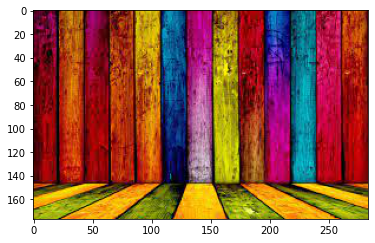

In [19]:
image = read_n_get_image("Color.jpg")
plt.imshow(image)

# Step-3 :- Resize Image

In [20]:
# Resizing of image is done so that KMeans does not take too much time to return the prominent colors
image = cv2.resize(image, (500, 500))

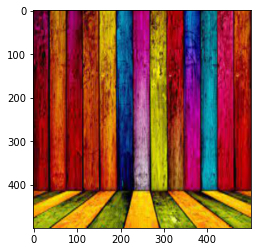

In [21]:
# Show the image after resizing
plt.imshow(image)

# Step-4 :- Creating the matrix of features for our K-Means Algorithm

In [22]:
print(type(image))
print(image)
print(image.shape)

<class 'numpy.ndarray'>
[[[ 59  30  26]
  [ 64  28  28]
  [ 71  25  30]
  ...
  [137  50  37]
  [ 96  19  14]
  [ 71   0   0]]

 [[ 58  30  26]
  [ 63  28  27]
  [ 71  25  30]
  ...
  [136  49  36]
  [ 96  18  14]
  [ 71   0   0]]

 [[ 54  25  22]
  [ 59  23  25]
  [ 68  21  28]
  ...
  [126  39  27]
  [ 92  15  10]
  [ 70   0   0]]

 ...

 [[151 156  26]
  [146 153  18]
  [139 149   6]
  ...
  [139 148  16]
  [139 148  14]
  [139 147  12]]

 [[138 144  42]
  [134 141  29]
  [127 137   9]
  ...
  [133 142  26]
  [133 143  22]
  [133 143  19]]

 [[137 143  43]
  [133 140  30]
  [126 136   9]
  ...
  [133 142  26]
  [133 143  22]
  [133 143  20]]]
(500, 500, 3)


In [23]:
# x is the matrix of features to be supplied to the KMeans Algorithm
x = image.reshape(image.shape[0]*image.shape[1],3)

In [24]:
print(x)

[[ 59  30  26]
 [ 64  28  28]
 [ 71  25  30]
 ...
 [133 142  26]
 [133 143  22]
 [133 143  20]]


# Step-5 :- Building the KMeans Clustering Model to find out the top five prominent colors in the model

In [25]:
kmeans = KMeans(n_clusters=5)

In [26]:
kmeans.fit(x)

KMeans(n_clusters=5)

In [27]:
prominent_colors = kmeans.cluster_centers_
prominent_colors = prominent_colors.astype(int)
print(prominent_colors)

[[ 64  23  22]
 [198 157  15]
 [ 12  95 141]
 [163  29  19]
 [174  42 130]]


Text(0.5, 1.0, 'Prominent Colors')

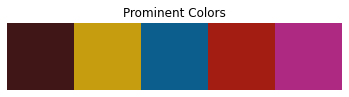

In [28]:
plt.imshow([prominent_colors])
plt.axis('off')
plt.title("Prominent Colors")

# Step-6 :- Get the ordering of prominency among the colors

In [29]:
# Get the number of pixels participating in each cluster
intensity_list = Counter(kmeans.labels_)
print(intensity_list)

Counter({3: 85395, 1: 59776, 0: 47661, 2: 29353, 4: 27815})


In [30]:
keys = list(intensity_list.keys())
values = list(intensity_list.values())
print(keys)
print(values)

[0, 3, 1, 4, 2]
[47661, 85395, 59776, 27815, 29353]


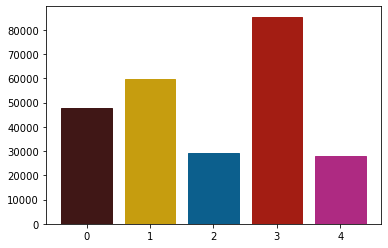

In [31]:
# Show the prominency levels on a bar graph
bar_graph = plt.bar(keys,values)
for x in range(0, len(prominent_colors)):
    bar_graph[x].set_color(prominent_colors[keys[x]].astype(float)/255.0)
plt.show(bar_graph)